In [ ]:
import pandas as pd
import datetime
import numpy as np
import pytz
import math
import matplotlib.pyplot as plt
!pip install eli5
!pip install shap
!pip install pdpbox

     |████████████████████████████████| 112kB 5.9MB/s 
     |████████████████████████████████| 327kB 6.2MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463912 sha256=da6aee6a87e5dfcffee6b2b3084226b2182f49151dfb440428cb2ca1542ae3a8
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap
     |████████████████████████████████| 57.7MB 75kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690724 sha256=e2c64f9dfa50a2de0a40725e164b3c386f934dab7d16b0c418e87c8cc2f646f1
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
weekEval1 = pd.read_csv('/content/drive/MyDrive/Big Data Bowl/week1_plays.csv', index_col=0)
weekEval2 = pd.read_csv('/content/drive/MyDrive/Big Data Bowl/week2_plays.csv', index_col=0)
weekEval1.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI,coverage,Trips,Trips_Side,Routes,offense,defense
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,cover 3,No,NaN,OUT|MID|HITCH:HITCH,ATL,PHI
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False,cover 3,No,NaN,HITCH:CROSS|MID|FLAT:HITCH,ATL,PHI
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False,cover 3,No,NaN,SLANT:SLANT|MID|GO,ATL,PHI
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False,cover 3,Yes,Left,HITCH:IN:CORNER|MID|,ATL,PHI
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False,cover 0,No,NaN,GO|MID|GO,ATL,PHI


In [ ]:
games4 = pd.read_csv('/content/drive/My Drive/Big Data Bowl/games.csv')
games4.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1


In [ ]:
plays = pd.read_csv('/content/drive/My Drive/Big Data Bowl/plays.csv')
#plays_with_coverage = pd.read_csv('/content/drive/My Drive/Big Data Bowl/plays_with_coverage.csv')

In [ ]:
week1 = pd.read_csv('/content/drive/My Drive/Big Data Bowl/week1.csv')
week3 = pd.read_csv('/content/drive/My Drive/Big Data Bowl/week3.csv')

In [ ]:
week1['time'] = pd.to_datetime(week1['time'], format = '%Y-%m-%dT%H:%M:%S').dt.tz_localize(None)
week3['time'] = pd.to_datetime(week3['time'], format = '%Y-%m-%dT%H:%M:%S').dt.tz_localize(None)

In [ ]:
week1[(week1['gameId'] == 2018090600) & (week1['playId'] == 75) & (week1['event'] == 'ball_snap')]

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
140,2018-09-07 01:07:15.599,91.74,26.67,0.00,0.00,0.01,277.41,235.01,ball_snap,310.0,Matt Ryan,2.0,QB,11,away,2018090600,75,left,NaN
141,2018-09-07 01:07:15.599,88.89,36.50,0.01,0.01,0.00,104.49,36.45,ball_snap,79848.0,Malcolm Jenkins,27.0,SS,11,home,2018090600,75,left,NaN
142,2018-09-07 01:07:15.599,91.36,44.14,0.00,0.01,0.02,289.53,49.86,ball_snap,2495454.0,Julio Jones,11.0,WR,11,away,2018090600,75,left,HITCH
143,2018-09-07 01:07:15.599,86.47,22.03,0.18,0.07,0.01,71.89,82.30,ball_snap,2495613.0,Corey Graham,24.0,FS,11,home,2018090600,75,left,NaN
144,2018-09-07 01:07:15.599,90.78,36.16,0.00,0.00,0.00,259.19,294.93,ball_snap,2533040.0,Mohamed Sanu,12.0,WR,11,away,2018090600,75,left,HITCH
145,2018-09-07 01:07:15.599,73.61,28.70,0.02,0.02,0.00,110.09,258.40,ball_snap,2534832.0,Rodney McLeod,23.0,FS,11,home,2018090600,75,left,NaN
146,2018-09-07 01:07:15.599,98.25,26.62,0.00,0.00,0.00,259.95,193.19,ball_snap,2543583.0,Devonta Freeman,24.0,RB,11,away,2018090600,75,left,NaN
147,2018-09-07 01:07:15.599,86.63,31.12,0.07,0.07,0.03,120.41,67.74,ball_snap,2552315.0,Jordan Hicks,58.0,MLB,11,home,2018090600,75,left,NaN
148,2018-09-07 01:07:15.599,82.63,20.50,0.03,0.03,0.01,84.07,211.08,ball_snap,2552689.0,Ronald Darby,21.0,CB,11,home,2018090600,75,left,NaN
149,2018-09-07 01:07:15.599,83.92,43.44,0.06,0.05,0.02,99.77,228.90,ball_snap,2555383.0,Jalen Mills,31.0,CB,11,home,2018090600,75,left,NaN


In [ ]:
week1

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-07 01:07:14.599,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN
1,2018-09-07 01:07:14.599,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN
2,2018-09-07 01:07:14.599,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH
3,2018-09-07 01:07:14.599,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN
4,2018-09-07 01:07:14.599,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986017,2018-09-11 05:29:39.900,33.68,43.14,1.96,3.79,0.22,281.35,309.70,None,2556277.0,Marqui Christian,41.0,SS,65,away,2018091001,4192,left,NaN
986018,2018-09-11 05:29:39.900,36.02,40.21,0.81,1.52,0.09,308.07,234.06,None,2556593.0,Cory Littleton,58.0,ILB,65,away,2018091001,4192,left,NaN
986019,2018-09-11 05:29:39.900,33.02,43.81,2.63,4.57,0.27,183.83,314.39,None,2556885.0,Jalen Richard,30.0,RB,65,home,2018091001,4192,left,SCREEN
986020,2018-09-11 05:29:39.900,34.13,40.86,0.15,0.72,0.02,6.17,267.87,None,2558183.0,John Johnson,43.0,SS,65,away,2018091001,4192,left,NaN


In [ ]:
plays_with_coverage.head()

NameError: ignored

In [ ]:
#basic data exploration
print("Yards to go when a team passes on 2nd down", plays[plays['down'] == 2]['yardsToGo'].median())
print("Yards to go when a team passes on 3rd down",plays[plays['down'] == 3]['yardsToGo'].median())
print("Yards to go when a team passes on 4th down",plays[plays['down'] == 4]['yardsToGo'].median())
print(plays[plays['passResult'] == 'C']['yardsToGo'].mean())
print(plays[plays['passResult'] == 'I']['yardsToGo'].mean())
print(plays[plays['down'] == 1]['epa'].median())
print(plays[plays['down'] == 2]['epa'].median())
print(plays[plays['down'] == 3]['epa'].median())
print(plays[plays['down'] == 4]['epa'].median())

In [ ]:
def Get_DB_Coords(week, gameId, playId):
  time_snap = week.loc[(week['gameId'] == gameId) & (week['playId'] == playId) & (week['event'] == 'ball_snap')]['time'].values[0]
  time_four_in = time_snap + pd.Timedelta(seconds = 2)
  new_time = week.loc[(week1['time'] > time_four_in) & (week['playId'] == playId)]['time'].values[0]
  new_df = week.loc[week1['time'] == new_time]
  filter = (week['position'] == 'SS') | (week['position'] == 'FS') | (week['position'] == 'CB') | (week['position'] == 'LB') | (week['position'] == 'MLB') | (week['position'] == 'ILB') | (week['position'] == 'S') | (week['position'] == 'DB') | (week['position'] == 'OLB')
  answer = new_df.loc[filter, ['x', 'y', 's', 'dir', 'o', 'position', 'event']]
  return answer

In [ ]:
Get_DB_Coords(week1, 2018090600, 75)

In [ ]:
def Get_All_Coords(week, gameId, lst_playId):
  lst_df = []
  for x in lst_playId:
    time_snap = week.loc[(week['gameId'] == gameId) & (week['playId'] == x) & (week['event'] == 'ball_snap')]['time'].values[0]
    time_four_in = time_snap + pd.Timedelta(seconds = 2)
    new_time = week.loc[(week1['time'] > time_four_in) & (week['playId'] == x)]['time'].values[0]
    new_df = week.loc[week1['time'] == new_time]
    filter = (week['position'] == 'SS') | (week['position'] == 'FS') | (week['position'] == 'CB') | (week['position'] == 'LB') | (week['position'] == 'MLB') | (week['position'] == 'ILB') | (week['position'] == 'S') | (week['position'] == 'DB') | (week['position'] == 'OLB')  | (week['position'] == 'WR')  | (week['position'] == 'RB') | (week['position'] == 'FB')  | (week['position'] == 'TE')  | (week['position'] == 'HB')
    temp = new_df.loc[filter, ['gameId', 'playId', 'x', 'y', 's', 'dir', 'o', 'displayName', 'position', 'event']]
    lst_df.append(temp)
    football = week.loc[(week['event'] == 'ball_snap') & (week['gameId'] == gameId) & (week['playId'] == x) & (week['displayName'] == 'Football'),['gameId', 'playId', 'x', 'y', 's', 'dir', 'o', 'displayName', 'position', 'event']]
    lst_df.append(football)
  answer = pd.concat(lst_df)
  return answer

The above function finds the ball snap time for a play number and gameid. Then adds two(might change this number later) seconds to the time and searches for the next closest time that is over that time. Returns a dataframe of all defenders and their positions

In [ ]:
def dist(pos1, pos2):
    val = math.sqrt((pos1[0]-pos2[0])**2 + (pos1[1]-pos2[1])**2)
    return val

In [ ]:
def Defender_dist(week, gameid, lst_playid):
    offense = ['RB', 'FB', 'WR', 'TE', 'HB']
    defense = ['SS','FS', 'MLB', 'CB', 'LB', 'OLB', 'ILB','DB', 'S']
    data = []
    for y in lst_playid:
      def_dict = {}
      off_dict = {}
      down_distance = plays.loc[(plays['gameId'] == gameid) & (plays['playId'] == y), ['down', 'yardsToGo']].values
      for x in defense:
        defense_data = week.loc[(week['gameId'] == gameid) & (week['playId'] == y) & (week['position'] == x),['x', 'y', 'position', 'displayName', 'o']].values #(week['event'] == 'pass_forward') & 
        if defense_data.shape[0] == 1:
          pos = defense_data[0][2]
          def_xy = defense_data[0][0:2]
          def_name = defense_data[0][3]
          def_o = defense_data[0][4]
          def_dict[def_name] = [def_xy, pos, def_o]
        elif defense_data.shape[0] == 0:
          pass
        else:
          for x in range(defense_data.shape[0]):
            pos = defense_data[x][2]
            def_xy = defense_data[x][0:2]
            def_name = defense_data[x][3]
            def_o = defense_data[x][4]
            def_dict[def_name] = [def_xy, pos, def_o]
      for x in offense:
        offense_data = week.loc[(week['gameId'] == gameid) & (week['playId'] == y) & (week['position'] == x),['x', 'y', 'position', 'displayName', 'o']].values  #(week['event'] == 'pass_forward') & 
        if offense_data.shape[0] == 1:
          pos = offense_data[0][2]
          off_xy = offense_data[0][0:2]
          off_name = offense_data[0][3]
          off_o = offense_data[0][4]
          off_dict[off_name] = [off_xy, pos, off_o]
        elif offense_data.shape[0] == 0:
          pass
        else:
          for x in range(offense_data.shape[0]):
            pos = offense_data[x][2]
            off_xy = offense_data[x][0:2]
            off_name = offense_data[x][3]
            off_o = offense_data[x][4]
            off_dict[off_name] = [off_xy, pos, off_o]
      for d_name, d_xy in def_dict.items():
        distance = 100
        name_o = ''
        receiver_o = 0
        for o_name, o_xy in off_dict.items():
          o_dist = dist(d_xy[0], o_xy[0])
          if o_dist < distance:
            distance = o_dist
            name_o = o_name
            receiver_o = o_xy[2]
        data.append([gameid, y, d_name, d_xy[1], distance, d_xy[0][0], d_xy[0][1], d_xy[2], name_o, receiver_o, down_distance[0][0], down_distance[0][1]])
      football = week.loc[(week['event'] == 'ball_snap') & (week['gameId'] == gameid) & (week['playId'] == y) & (week['displayName'] == 'Football'),['x', 'y', 'position', 'displayName', 'o']].values
      data.append([gameid, y, football[0][3], 'N/A', 'N/A', football[0][0], football[0][1], 'N/A', 'N/A', 'N/A'])
    output = pd.DataFrame(data, columns = ['gameId', 'playId', 'displayName', 'position', 'dist_to_receiver', 'd_x', 'd_y', 'defender_o', 'receiver_displayName', 'receiver_o', 'down', 'distance'])
    return output
#Defender_dist(week1, 2018090600, [752, 146])

In [ ]:
Defender_dist(week1, 2018090600, [75])

In [ ]:
def Trips_detector(week):
  gameid_lst = week.gameId.unique()
  data = []
  for x in gameid_lst:
    playid_lst = week[week['gameId'] == x].playId.unique()
    for y in playid_lst:
      #get x/y coordinates of qb and football to determine which way the offense is going
      Football = week.loc[(week['event'] == 'ball_snap') & (week['gameId'] == x) & (week['playId'] == y) & (week['displayName'] == 'Football'),['x', 'y']].values
      QB = week.loc[(week['event'] == 'ball_snap') & (week['gameId'] == x) & (week['playId'] == y) & (week['position'] == 'QB'),['x', 'y']].values
      Receivers = week.loc[(week['event'] == 'ball_snap') & (week['gameId'] == x) & (week['playId'] == y) & ((week['position'] == 'WR') | (week['position'] == 'TE')),['x', 'y']].values
      right = 0
      left = 0
      if QB.shape[0] == 0:
        QB = week.loc[(week['event'] == 'ball_snap') & (week['gameId'] == x) & (week['playId'] == y) & (week['position'] == 'P'),['x', 'y']].values
      if QB[0][0] > Football[0][0]:
        for z in Receivers:
          if z[1] >Football[0][1]:
            right += 1
          else:
            left += 1
      else:
        for z in Receivers:
          if z[1] < Football[0][1]:
            right += 1
          else:
            left += 1
      if right > 2:
        data.append([x, y, 'Yes', 'Right'])
      elif left > 2:
        data.append([x, y, 'Yes', 'Left'])
      else:
        data.append([x, y, 'No', np.nan])
  output = pd.DataFrame(data, columns = ['gameId', 'playId', 'Trips', 'Offensive_Side'])
  return output

In [ ]:
def dist_to_los(week, gameid, playid):
  defense = ['SS','FS', 'MLB', 'CB', 'LB', 'OLB', 'ILB','DB', 'S']
  los = week.loc[(week['event'] == 'ball_snap') & (week['gameId'] == gameid) & (week['playId'] == playid) & (week['displayName'] == 'Football'), 'x'].values
  defense_dist = []
  for x in defense:
    data = week.loc[(week['event'] == 'ball_snap') & (week['gameId'] == gameid) & (week['playId'] == playid) & (week['position'] == x), ['x', 'position', 'displayName']].values
    for y in range(data.shape[0]):
        pos = data[y][1]
        def_x = data[y][0]
        def_name = data[y][2]
        distance = abs(def_x-los[0])
        defense_dist.append([def_name, pos, distance])
  output = pd.DataFrame(defense_dist, columns = ['displayName', 'position', 'distance_to_los'])
  return output
dist_to_los(week1, 2018090600, 752)

In [ ]:
games = week1.gameId.unique()
plays_lst = [75,  146,  168,  190,  256,  320,  344,  402,  492,  521,  545,
        636,  752,  776,  839,  889,  949,  992, 1037, 1061, 1085, 1202,
       1226, 1295, 1344, 1423, 1473, 1546, 1568, 1628, 1680, 1715, 1750,
       1779, 1801, 1869, 1894, 1916, 1940, 2055, 2094, 2116, 2260, 2305,
       2360, 2382, 2450, 2474, 2503, 2575, 2624, 2648, 2693, 2736, 2764,
       2811, 2980, 3004, 3066, 3095, 3181, 3203, 3257, 3279, 3392, 3481,
       3507, 3626, 3678, 3791, 3815, 3844, 3904, 3928, 3950, 3979, 4142,
       4166, 4207, 4239, 4258, 4282, 4306, 4325, 4366, 4395, 4417, 4439,
       4472]
testing = Get_All_Coords(week1, 2018090600, plays_lst)
nearest = Defender_dist(testing, 2018090600, plays_lst)


In [ ]:
nearest.loc[nearest['playId'] == 636]

In [ ]:
def distance_from_ball(data,playNum):
  '''
  Parameters: Dataframe and playnumber
  Output: Returns new dataframe with distance from the football at a given event
  '''
  df = data.query('playId == @playNum')
  df = df.assign(distance_from_ball_x = abs(df.d_x - df.query('displayName == "Football"').d_x.values), distance_from_ball_y = abs(df.d_y - df.query('displayName == "Football"').d_y.values))
  return df

play_data = distance_from_ball(nearest, 75)

In [ ]:
def coverage2(data):
  """

  Parameters:
    -data: Dataframe object
  Returns:
    New Dataframe with coverage for each play
  """

  playNums = data.playId.unique()
  coverages = {}
  games = []
  for play in playNums:
    coverages[play] = {}  
    df = data.copy()
    df = distance_from_ball(df,play)
    defenders = ['CB','FS','SS','DB','MLB','OLB','ILB','LB','S']
    #Finding the initial football position for LOS
    df = df[df.position.isin(defenders)].query('displayName != "Football" and playId == @play')
    for index,row in df.iterrows():
      x = row.distance_from_ball_x
      y = row.distance_from_ball_y
      ball_o = week1.query('position == "QB" and event == "ball_snap" and playId == @play').o.values[0]
      game = row.gameId
      #setting different zone drops for various distance for first down
      if row.distance > 15: #deep drops
        db_depth_c2 = 25
        db_depth_c3 = 16
      else: #shallow drops
        db_depth_c2 = 18
        db_depth_c3 = 10
      #determining man vs zone coverage by player orientation 
      if row.defender_o > 330 and row.receiver_o < 30: #standardizing by degrees
        row.defender = row.defender_o - 360
      elif row.defender_o < 30 and row.receiver_o > 330:
        row.offense_o = row.receiver_o - 360
      if row.dist_to_receiver <=2: 
         #man coverage
        if 'man_to_man' in coverages[play]:
          coverages[play]['man_to_man'] += 1
        else:
          coverages[play]['man_to_man'] = 1
      #zone coverage
      else:
        if x >= db_depth_c2 and y >= 6 and 170 < abs(row.defender_o - ball_o) < 190: #deep and not in the middle range of the ball
          if 'deep_half' in coverages[play]:
            coverages[play]['deep_half'] += 1
          else:
            coverages[play]['deep_half'] = 1
        elif x > db_depth_c3: #middle thirds typically intermediate and in the middle of the ball
          if 0 < y < 6:
            if 'middle_third' in coverages[play]:
              coverages[play]['middle_third'] += 1
            else:
              coverages[play]['middle_third'] = 1
          else:
            if 'outside_third' in coverages[play]:
              coverages[play]['outside_third'] += 1 #on the outside hashes away from the ball
            else:
              coverages[play]['outside_third'] = 1
        elif row.distance_from_ball_x <= 3 and row.distance_from_ball_y <= 3: #close to the ball, must be blitzing or pass rushing
            if 'blitzer' in coverages[play]:
              coverages[play]['blitzer'] += 1
            else:
              coverages[play]['blitzer'] = 1
        elif 170 < abs(row.defender_o - ball_o) < 190: #defenders facing the ball
            if 'hook_flat_zone' in coverages[play]:
              coverages[play]['hook_flat_zone'] += 1
            else:
                coverages[play]['hook_flat_zone'] = 1 
        games.append(game)

  #building dataframe
  columns=['deep_half','middle_third','outside_third','hook_flat_zone','man_to_man','blitzer']

  newdf = pd.DataFrame(coverages)
  newdf = newdf.transpose()
  newdf.reset_index(inplace=True)
  newdf['gameID'] = pd.Series(games)
  newdf.fillna(0, inplace = True)
  return newdf

def coverage_creator(row):
  '''
  Parameters: Dataframe
  Returns: Dataframe with coverage, based on players in different positions
  '''
  if row.man_to_man >= 2: #two players in man coverage
    if row.deep_half >= 1:
      return 'cover 2 man'
    if row.middle_third >= 1:
      return 'cover 1 man'
    if row.middle_third + row.deep_half == 0:
      return 'cover 0' 
    else:
      return 'match coverage'
  else:
    if row.middle_third == 1 or  row.outside_third >= 1 :
      return  'cover 3'
    elif row.deep_half >= 1:
      return 'cover 2'
    else:
      return 'match coverage'


final = coverage2(nearest)
final['coverage'] = final.apply(coverage_creator,axis = 1)

In [ ]:

def offense(df):
  '''
  Returns updated dataframe with which team has the ball
  '''
  lst = []
  for index, row in df.iterrows():
    playNum = row['index']
    game = row.gameID
    posteam = plays.query('playId == @playNum and gameId == @game').possessionTeam.values[0]
    lst.append(posteam)
  df['offense'] = lst
  return df

def defense(df):
  '''
  Returns an updated dataframe with which defense is on the field
  '''
  lst = []
  for index, row in df.iterrows():
    playNum = row['index']
    game = row.gameID
    offense = row.offense
    #print(offense)
    www = games4[['homeTeamAbbr','visitorTeamAbbr']].values[0]
    if offense not in www[0]:
      defense = www[0]
    if offense not in www[1]:
      defense = www[1]
    lst.append(defense)
  df['defense'] = lst
  return df

offense(final)
defense(final)

In [ ]:
print(final.offense.value_counts())
print(final.defense.value_counts())

In [ ]:
week3.loc[(week3['gameId'] == 2018092309) & (week3['playId'] == 2100)].position.unique()

In [ ]:
Trips_detector(week3)

# Plays with Pre Snap Motion

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Big Data Bowl/week11.csv')
data.head()

In [ ]:

def presnap(df):
  '''
  Creates dataframe of only plays with presnap motion
  '''
  lst = set(df.loc[df.event == 'man_in_motion']['playId'].values)
  df['pre_snap_motion'] = 'No'
  df.loc[df['playId'].isin(motionplays), 'pre_snap_motion'] = 'Yes'
  return df
newdf = presnap(data)
data.pre_snap_motion.value_counts()

### Visualizations

In [ ]:
newdf = Get_DB_Coords(week1, 2018090900, 4303)

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    rect = mpatches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = mpatches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = mpatches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax


In [ ]:
fig, ax = create_football_field()
newdf = week1.query('event == "pass_forward" and playId == 492')
n = newdf.position
x = newdf.x.values
y = newdf.y.values
newdf.plot(x = 'x', y = 'y', kind = 'scatter', ax=ax, color='orange', s=150)
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]), fontsize=19)

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly
PATH = '/content/drive/My Drive/Big Data Bowl/'
def create_animation(w,p):
    d_f = pd.read_csv(PATH+ w +'.csv')
    dd =d_f[(d_f.playId==p)]
    times = dd.time.unique()
    time_slice = times[0:500:5]
    df = dd[dd.time.isin(time_slice)]
                     
    colorsIdx = {'home': 'red', 'away': 'blue', 'football': 'orange'}
    fig = px.scatter(df, x='x', y='y', color='team', text='jerseyNumber', animation_frame='time', 
                     color_discrete_map=colorsIdx,
                     range_x=[-10, 110],range_y=[-10, 53.3],
                     hover_data=['displayName', 'position', 's', 'a', 'dis', 'o', 'playDirection']
                    )
    fig.update_traces(marker_size=20)
    
    fig.update_layout(paper_bgcolor='#29a500', plot_bgcolor='#29a500', font_color='white',
        width = 800,
        height = 600,
        title = "",
        
        xaxis = dict(
        nticks = 10,
        title = "",
        visible=False
        ),
        
        yaxis = dict(
        scaleanchor = "x",
        title = "Temp",
        visible=False
        ),
        showlegend= True,
  
        annotations=[
       dict(
            x=-5,
            y=12,
            xref="x",
            yref="y",
            text="HOME ENDZONE",
            font=dict(size=16,color="#e9ece7"),
            align='center',
            showarrow=False,
            yanchor='bottom',
            textangle=-90
        ),
        dict(
            x=105,
            y=10,
            xref="x",
            yref="y",
            text="VISITOR ENDZONE",
            font=dict(size=16,color="#e9ece7"),
            align='center',
            showarrow=False,
            yanchor='bottom',
            textangle=90
        )]  
        ,
        legend=dict(
        traceorder="normal",
        font=dict(family="sans-serif",size=12),
        title = "",
        orientation="h",
        yanchor="bottom",
        y=1.00,
        xanchor="center",
        x=0.5
        ),
    )
    ####################################################
        
    fig.add_shape(type="rect", x0=-10, x1=0,  y0=0, y1=53.3,line=dict(color="#c8ddc0",width=3),fillcolor="#217b00" ,layer="below")
    fig.add_shape(type="rect", x0=100, x1=110, y0=0, y1=53.3,line=dict(color="#c8ddc0",width=3),fillcolor="#217b00" ,layer="below")
    for x in range(0, 100, 10):
        fig.add_shape(type="rect", x0=x,   x1=x+10, y0=0, y1=53.3,line=dict(color="#c8ddc0",width=3),fillcolor="#29a500" ,layer="below")
    for x in range(0, 100, 1):
        fig.add_shape(type="line",x0=x, y0=1, x1=x, y1=2,line=dict(color="#c8ddc0",width=2),layer="below")
    for x in range(0, 100, 1):
        fig.add_shape(type="line",x0=x, y0=51.3, x1=x, y1=52.3,line=dict(color="#c8ddc0",width=2),layer="below")
    
    for x in range(0, 100, 1):
        fig.add_shape(type="line",x0=x, y0=20.0, x1=x, y1=21,line=dict(color="#c8ddc0",width=2),layer="below")
    for x in range(0, 100, 1):
        fig.add_shape(type="line",x0=x, y0=32.3, x1=x, y1=33.3,line=dict(color="#c8ddc0",width=2),layer="below")
    
    
    fig.add_trace(go.Scatter(
    x=[2,10,20,30,40,50,60,70,80,90,98], y=[5,5,5,5,5,5,5,5,5,5,5],
    text=["G","1 0","2 0","3 0","4 0","5 0","4 0","3 0","2 0","1 0","G"],
    mode="text",
    textfont=dict(size=20,family="Arail"),
    showlegend=False,
    ))
    
    fig.add_trace(go.Scatter(
    x=[2,10,20,30,40,50,60,70,80,90,98], y=[48.3,48.3,48.3,48.3,48.3,48.3,48.3,48.3,48.3,48.3,48.3],
    text=["G","1 0","2 0","3 0","4 0","5 0","4 0","3 0","2 0","1 0","G"],
    mode="text",
    textfont=dict(size=20,family="Arail"),
    showlegend=False,
    ))
    
    return fig
weekId=1
playId = 2055 #from GameId=2018111900 #2055
week_num = 'week1'
fig= create_animation(week_num,playId) 
#fig.write_html("file.html")
#fig.write_json("BearsAni2.json")


fig.show()

## Pre Snap Motion

In [ ]:
successfulplays = set(week1.loc[week1.event == 'pass_outcome_caught']['playId'].values)

week1['success'] = 0
week1.loc[week1['playId'].isin(successfulplays), 'success'] = 1


#getting play # with motion plays
play_numbers = set(week1.loc[week1.event == 'man_in_motion']['playId'].values)

#creating df from those plays
plays_with_motion = week1.loc[week1.playId.isin(play_numbers)]

def get_distance(x2,y2,x1,y1):
    return np.sqrt(((x2-x1)**2) + ((y2-y1)**2))

def motion_distance(df):
  '''
  Parameters: 
  Input = Dataframe
  Output return dataframe of player movement during presnap motion
  '''
    d =[]
    #defenders
    players = ['SS','FS', 'MLB', 'CB', 'LB', 'OLB', 'ILB', 'DL', 'DB', 'NT', 'S', 'DE']
    #looping through each game per week
    for game in week1['gameId'].unique():
      #looping through each play in game
        for plays in week1.loc[week1['gameId']== game]['playId'].unique():
          #looping through the defenders
            for x in players:
              #iterating through input dataframe
                for index, row in df[(df['playId'] == plays) & (df['gameId'] == game)&(df['position']==x) & (df['displayName'] != 'Football') & (df['event'] == 'man_in_motion')].iterrows():
                    #getting variables of each row
                    name = row['displayName']
                    x_motion = row['x']
                    y_motion = row['y']
                    position = row['position']
                    s_motion = row['s'] #
                    o_motion = row['o'] #
                    a_motion = row['a'] #
                    dir_motion = row['dir'] #
                    dis_motion = row['dis'] #
                    pass_caught = row['success']
                    #finding where the ball is for operations
                    ball = df[(df['playId'] == plays) & (df['gameId'] == game)&(df['displayName'] == name) & (df['event'] == 'ball_snap')]
                    x_ball = ball['x'].values
                    y_ball = ball['y'].values
                    s_ball = ball['s'].values #
                    o_ball = ball['o'].values #
                    a_ball = ball['a'].values #
                    dir_ball = ball['dir'].values #
                    dis_ball = ball['dis'].values # 
                    #finding the player distance from the ball to determine coverages                   
                    distance = get_distance(x_ball,y_ball,x_motion,y_motion)
                    #Building nested dictionary 
                    d.append(
                        {
                            'Player': name,
                            'Position':position,
                            'Pass_caught_or_not': pass_caught,
                            'gameId': game,
                            'playId': plays,
                            'Distance':  distance,
                            'A_change': a_ball - a_motion,
                            'S_change': s_ball - s_motion,
                            'O_change': o_ball - o_motion,
                            'Direct_change': dir_ball - dir_motion,
                            'Displace_change': dis_ball - dis_motion,
                            
                       }
                    ) 
    #Creating dataframe from nested dictionary
    data = pd.DataFrame(d)
    data['Movement'] = data['Distance'].str[0]
    data['Dir_change'] = data['Direct_change'].str[0]
    data['Acc_change'] = data['A_change'].str[0]
    data['Speed_change'] = data['S_change'].str[0]
    data['Orien_change'] = data['O_change'].str[0]
    data['Dis_change'] = data['Displace_change'].str[0]

    data.drop('Distance', axis = 1, inplace = True)
    data.drop('A_change', axis = 1, inplace = True)
    data.drop('S_change', axis = 1, inplace = True)
    data.drop('O_change', axis = 1, inplace = True)
    data.drop('Displace_change', axis = 1, inplace = True)
    data.drop('Direct_change', axis = 1, inplace = True)


    return data

fff = motion_distance(plays_with_motion)
fff.head(10)

In [ ]:
#joining weekly dataframe with the coverages and motion changes
combined_df = fff.merge(weekEval1[['gameId', 'playId','coverage', 'Trips', 'Offensive_Side']], how = 'inner',  on = ['playId','gameId'])
combined_df.head()

# Machine Learning With Full Presnap Data

In [ ]:
presnap = pd.read_csv('/content/drive/MyDrive/Big Data Bowl/PreSnapMotionAllWeeks.csv')

target = presnap.pop('Pass_caught_or_not') #Y variable

#Matrix of Predictor dataframe
matrix = presnap.drop(['Unnamed: 0','Player','playId','gameId','offense',
'defense'], axis = 1)
#Turning categorical variables into dummies
matrix = pd.get_dummies(matrix, columns = ['Position', 'coverage','Trips'])
matrix.head() 


,Movement,Dir_change,Acc_change,Speed_change,Orien_change,Dis_change,Position_CB,Position_DB,Position_DE,Position_DL,Position_FS,Position_ILB,Position_LB,Position_MLB,Position_OLB,Position_S,Position_SS,coverage_cover 0,coverage_cover 1 man,coverage_cover 2,coverage_cover 2 man,coverage_cover 3,coverage_match coverage,Trips_No,Trips_Yes
0,0.474342,-29.17,-0.49,0.39,-7.33,0.04,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
1,1.327742,-13.29,-0.59,1.22,-6.25,0.12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0.530000,-175.81,2.33,1.58,-17.33,0.13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.700357,29.62,-0.62,0.13,-12.36,0.02,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.260192,-5.01,2.23,0.65,8.57,0.03,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
target.value_counts()

1    3248
0    1386
Name: Pass_caught_or_not, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(matrix, target, test_size=0.2, random_state=42)
# Decision Tree
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree_T = round(decision_tree.score(x_test, y_test) * 100, 2)
print('Decision Tree Results')
print(f'Training Accuracy {round(acc_decision_tree,2,)} %')
print(f'Training Accuracy {round(acc_decision_tree_T,2,)} %')
from sklearn.metrics import precision_score, recall_score, f1_score


print("Precision: %.2f%%" %( precision_score(y_train, predictions)))
print("Recall: %.2f%%" % (recall_score(y_train, predictions)))
print("F1 score: %.2f%%" % (f1_score(y_train, predictions)))

Decision Tree Results
Training Accuracy 100.0 %
Training Accuracy 58.14 %
Precision: 0.70%
Recall: 0.69%
F1 score: 0.70%


In [ ]:
#Confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(decision_tree, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[ 363,  750],
       [ 803, 1791]])

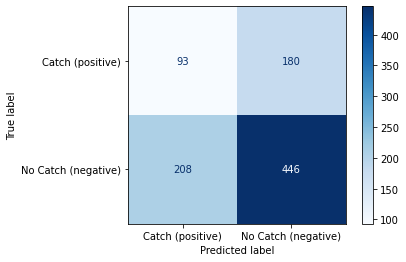

In [ ]:
from sklearn.metrics import plot_confusion_matrix
class_names = ['Catch (positive)', 'No Catch (negative)']
plot_confusion_matrix(decision_tree, x_test, y_test, display_labels=class_names,
                                 cmap=plt.cm.Blues, values_format = '.0f')  
plt.show() 

Text(0, 0.5, 'True positive rate')

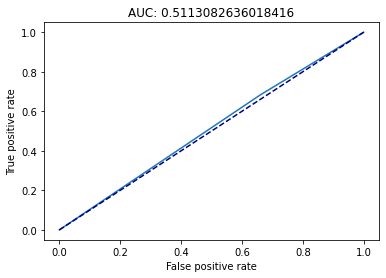

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

preds = decision_tree.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, preds, pos_label=1)

auc = roc_auc_score(y_test, preds)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], color='navy', linestyle='--', label='random')
plt.title(f'AUC: {auc}')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')

In [ ]:
importances = pd.DataFrame({'feature':matrix.columns,'importance':np.round(decision_tree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.importance.iloc[14::-1,].plot(
    kind='barh', figsize=(10, 5),
    title='Top 15 Features for predicting Catch or No Catch'
)
plt.xlabel('importance')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
# make predictions for test data
pred = rf.predict(x_test)
	
# evaluate predictions
accuracy = accuracy_score(y_test, pred)
print('Random Forest Results')
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))

pred = np.where(pred == 'No_Catch', 0,pred)
pred = np.where(pred == 'Catch', 1, pred)
y_test = np.where(y_test == 'No_Catch', 0,y_test)
y_test = np.where(y_test == 'Catch', 1, y_test)
y_test = y_test.astype('float64') 
pred = pred.astype('float64') 

print("Precision: %.2f%%" %  (precision_score(y_test, pred)))
print("Recall: %.2f%%" % (recall_score(y_test, pred)))
print("F1 score: %.2f%%" % (f1_score(y_test, pred)))

Random Forest Results
Test Accuracy: 69.47%
Precision: 0.71%
Recall: 0.96%
F1 score: 0.82%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Text(0, 0.5, 'True positive rate')

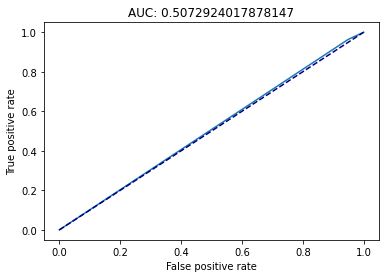

In [ ]:
preds = rf.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, preds, pos_label=1)

auc = roc_auc_score(y_test, preds)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], color='navy', linestyle='--', label='random')
plt.title(f'AUC: {auc}')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf, random_state=1).fit(x_train, y_train)
eli5.show_weights(perm, feature_names = x_train.columns.tolist())

In [ ]:
import shap  # package used to calculate Shap values

#arbitrarily looking at row 20
row_to_show = 200
data_for_prediction = x_train.iloc[row_to_show]

# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [ ]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=rf, dataset=x_train, model_features=x_train.columns.tolist(), feature='Movement')

# plot it
fig, axes = pdp.pdp_plot(pdp_goals, 'Defender Movement during Pre-Snap Motion')
_ = axes['pdp_ax'].set_xlabel('Player Movement in yards')
_ = axes['pdp_ax'].set_ylabel('Probability of Completing a Pass')

plt.show()

In [ ]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=rf, dataset=x_train, model_features=x_train.columns.tolist(), feature='Dir_change')

# plot it
fig, axes = pdp.pdp_plot(pdp_goals, 'Defender Direction Change with Pre-Snap motion')
_ = axes['pdp_ax'].set_xlabel('Player Direction Change in degrees')
_ = axes['pdp_ax'].set_ylabel('Probability of Completing a Pass')

plt.show()

#Dir_change
#0.1153 ± 0.0030	Orien_change
#0.0920 ± 0.0035	Acc_change

In [ ]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=rf, dataset=x_train, model_features=x_train.columns.tolist(), feature='Orien_change')

# plot it
fig, axes = pdp.pdp_plot(pdp_goals, 'Defender Orientation change with Pre-snap motion')
_ = axes['pdp_ax'].set_xlabel('Player Orientation Change in degrees')
_ = axes['pdp_ax'].set_ylabel('Probability of Completing a Pass')

plt.show()

#0.0920 ± 0.0035	Acc_change

In [ ]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=rf, dataset=x_train, model_features=x_train.columns.tolist(), feature='Acc_change')

# plot it
fig, axes = pdp.pdp_plot(pdp_goals, 'Defender Acceleration Change with Pre-snap motion')
_ = axes['pdp_ax'].set_xlabel('Player Acceleration Change in yards per second ^2')
_ = axes['pdp_ax'].set_ylabel('Probability of Completing a Pass')

plt.show()

### Team Output

In [ ]:
presnap = pd.read_csv('/content/drive/MyDrive/Big Data Bowl/PreSnapMotionAllWeeks.csv')
presnap.Trips.fillna('No', inplace= True) #Filling missing Trips values with no
presnap.loc[(presnap.Pass_caught_or_not == 1), 'Pass_caught_or_not'] = 'Catch' #Turning catch/no catch into binary values
presnap.loc[(presnap.Pass_caught_or_not == 0),'Pass_caught_or_not'] = 'No_Catch'

target2 = presnap.Pass_caught_or_not #Y variable

#Gathering the x variables and getting dummies of categorical variables
matrix2 = presnap.drop(['Pass_caught_or_not','Position','Unnamed: 0','Player','playId','gameId','offense','defense'], axis = 1)
matrix2 = pd.get_dummies(matrix2, columns = ['coverage','Trips'])
matrix2.head() 

,Movement,Dir_change,Acc_change,Speed_change,Orien_change,Dis_change,coverage_cover 0,coverage_cover 1 man,coverage_cover 2,coverage_cover 2 man,coverage_cover 3,coverage_match coverage,Trips_No,Trips_Yes
0,0.474342,-29.17,-0.49,0.39,-7.33,0.04,0,0,0,0,1,0,0,1
1,1.327742,-13.29,-0.59,1.22,-6.25,0.12,0,0,0,0,1,0,0,1
2,0.530000,-175.81,2.33,1.58,-17.33,0.13,0,0,0,0,1,0,0,1
3,0.700357,29.62,-0.62,0.13,-12.36,0.02,0,0,0,0,1,0,0,1
4,0.260192,-5.01,2.23,0.65,8.57,0.03,0,0,0,0,1,0,0,1


## Weekly Function

In [ ]:
def scouting():
  '''
  Creates a scouting report of the opposing defenses:
  Coverage, Coverage %, Catch/No-Catch probability, Outcome Prediction
  parameters - None
  output - Dataframe with coverages, catch probability and coverage percentages
  '''

  #initial list of all coverages
  allcoverages = ['cover 3', 'match coverage', 'cover 0', 'cover 1 man','cover 2 man', 'cover 2']
  d = []
  defense = input('Enter opposing defense [acroynm i.e Chicago = CHI]: ').upper()
  trips = input('Trips formation? [y/n]: ')

  #getting player means of player movement
  for scheme in allcoverages:
    Move = presnap.query('coverage == @scheme and defense == @defense').Movement.mean()
    Dir = presnap.query('coverage == @scheme and defense == @defense').Dir_change.mean()
    Acc = presnap.query('coverage == @scheme and defense == @defense').Acc_change.mean()
    Speed = presnap.query('coverage == @scheme and defense == @defense').Speed_change.mean()
    Orien = presnap.query('coverage == @scheme and defense == @defense').Orien_change.mean()
    Dis = presnap.query('coverage == @scheme and defense == @defense').Dis_change.mean()

    #Getting percentage of each coverage played
    percent_coverage = (len(presnap.query('coverage == @scheme and defense == @defense'))/len(presnap.query('defense == @defense'))) * 100

    #checking if any of values are Nan replacing with 0
    playerlst = [Move, Dir, Acc, Speed, Orien, Dis]
    for index, number in enumerate(playerlst):
      if np.isnan(number) == True:
        playerlst[index] = 0

    #creating empty array then filling values based on coverages
    coveragelst = np.zeros(6)
    tripslst = np.zeros(2)
    if scheme == 'cover 0':
      coveragelst[0] = 1
    if scheme == 'cover 1 man':
      coveragelst[1] = 1
    if scheme == 'cover 2':
      coveragelst[2] = 1
    if scheme == 'cover 2 man':
      coveragelst[3] = 1
    if scheme == 'cover 3':
      coveragelst[4] = 1
    if scheme == 'match coverage':
      coveragelst[5] = 1
    if trips == 'y':
      tripslst[1] = 1
    if trips == 'n':
      tripslst[0] = 1

    finallst = np.concatenate([playerlst, coveragelst, tripslst])

  #splitting the model
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    x_train, x_test, y_train, y_test = train_test_split(matrix2, target2, test_size=0.2, random_state=42)
    # Decision Tree
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict([finallst])
    pred_y = [p[0] for p in pred]

    #using inputs + array to predict value of each coverage
    proba = rf.predict_proba([finallst])
    #prob of no catch
    prob_nc = [p[1] for p in proba]
    #prob of catch
    prob_c = [p[0] for p in proba]
    d.append({'coverage':scheme, 'coverage_percentage':round(percent_coverage,1), 'no_catch_probability': round(prob_nc[0] * 100,1), 'catch_probability': round(prob_c[0] * 100,1),'predicted_outcome':pred[0]})
    df = pd.DataFrame(d)
    df.sort_values(by = 'coverage_percentage', inplace = True, ascending = False )

  return df

df = scouting()
df.style.highlight_max(subset =['no_catch_probability','catch_probability'], axis=0)

#df.style.applymap(lambda x: 'background-color : green' if x>85 else 'background-color : yellow', ]])



Enter opposing defense [acroynm i.e Chicago = CHI]: BAL
Trips formation? [y/n]: y


,coverage,coverage_percentage,no_catch_probability,catch_probability,predicted_outcome
0,cover 3,59.100000,24.000000,76.000000,Catch
1,match coverage,16.800000,41.000000,59.000000,Catch
2,cover 0,12.800000,26.000000,74.000000,Catch
3,cover 1 man,11.400000,44.000000,56.000000,Catch
4,cover 2 man,0.000000,17.000000,83.000000,Catch
5,cover 2,0.000000,75.000000,25.000000,No_Catch
